In [7]:
!pip install numpy matplotlib opencv-python
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Fourier Transform in Image Processing

The Fourier Transform is a mathematical technique used in image processing to transform an image from its spatial domain into the frequency domain. Understanding the frequency components of an image is crucial for many applications like image filtering, restoration, and analysis.
  - The original image and its magnitude spectrum are displayed side by side.
  - The magnitude spectrum reveals where the different frequencies are present in the image. The center of the spectrum represents low frequencies, and the edges represent high frequencies.

### Key Concepts
- **Spatial vs. Frequency Domain**: In the spatial domain, images are represented as they are, with pixel intensities. In the frequency domain, images are represented in terms of frequencies and amplitudes.
- **Frequency Components**: High frequencies in an image are associated with edges and rapid intensity changes, while low frequencies are associated with smooth, slowly varying regions.
- **Magnitude Spectrum**: The magnitude spectrum shows how much of each frequency is present in the image. It's a way to analyze the frequency content of the image.

Understanding the frequency content of an image is fundamental to many advanced image processing techniques.

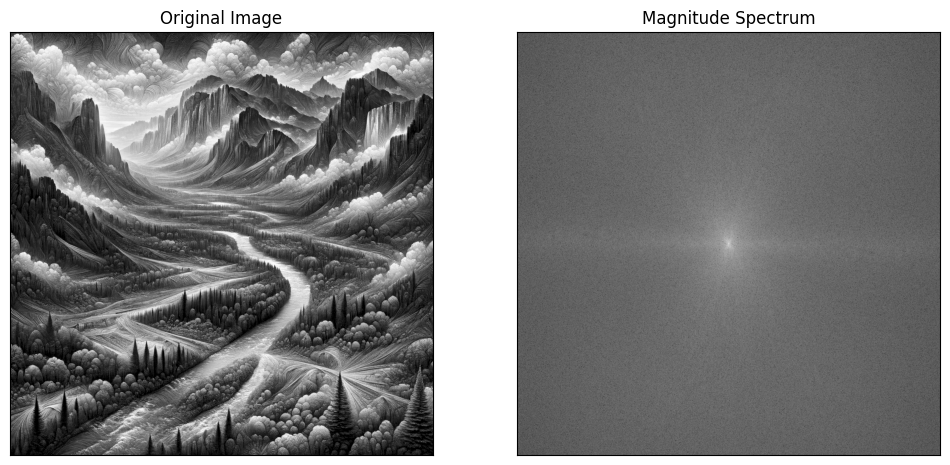

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image (Ensure the path is correct)
image_path = 'input_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

# Display the original image and its Fourier Transform
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Frequency Filters in Image Processing

In image processing, frequency filters are used to manipulate the frequency components of an image. They are essential for tasks like noise reduction, image sharpening, and feature extraction. Different types of frequency filters have specific applications and effects:

### 1. High Pass Filter
- **Description**: High pass filters allow high frequencies to pass through while attenuating (reducing the strength of) low frequencies. 
- **Application**: Useful for enhancing or detecting edges in an image, as edges correspond to high-frequency components.
- **How it Works**: It works by subtracting the low-frequency components from the image. In the Fourier Transform domain, this is typically done by creating a mask that blocks the central low-frequency regions.

### 2. Low Pass Filter
- **Description**: Low pass filters do the opposite of high pass filters; they allow low frequencies to pass while attenuating high frequencies.
- **Application**: Effective for noise reduction and image smoothing, as it removes high-frequency noise from an image.
- **How it Works**: In the Fourier Transform domain, a mask is applied to retain the central portion (low frequencies) and remove the outer portion (high frequencies) of the spectrum.

### 3. Band Stop Filter
- **Description**: Band stop filters are designed to remove frequencies that lie within a certain range.
- **Application**: Useful for eliminating specific types of noise or interference that have a known frequency range.
- **How it Works**: It involves creating a mask in the Fourier domain that blocks frequencies within a certain radius, effectively removing a band of frequencies from the image.

These filters are fundamental tools in the domain of frequency analysis and processing, allowing for precise control over which aspects of an image are emphasized or suppressed.

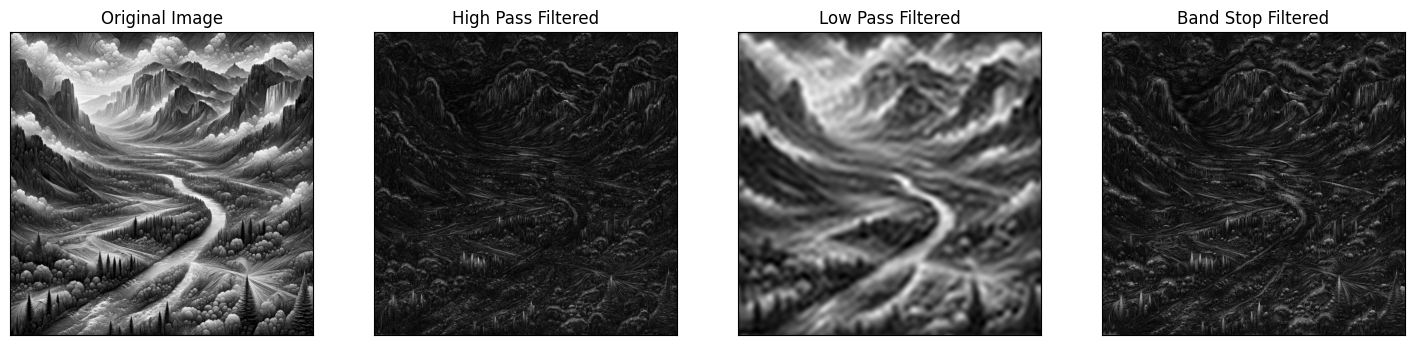

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale (Ensure the path is correct)
image_path = 'input_image.png'  # Update with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Dimensions of the image
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# High Pass Filter
mask_high = np.ones((rows, cols), np.uint8)
mask_high[crow-30:crow+30, ccol-30:ccol+30] = 0
fshift_high = fshift * mask_high
img_back_high = np.fft.ifft2(np.fft.ifftshift(fshift_high))
img_back_high = np.abs(img_back_high)

# Low Pass Filter
mask_low = np.zeros((rows, cols), np.uint8)
mask_low[crow-30:crow+30, ccol-30:ccol+30] = 1
fshift_low = fshift * mask_low
img_back_low = np.fft.ifft2(np.fft.ifftshift(fshift_low))
img_back_low = np.abs(img_back_low)

# Band Stop Filter (removing middle frequencies)
mask_band_stop = np.ones((rows, cols), np.uint8)
mask_band_stop[crow-15:crow+15, ccol-15:ccol+15] = 0
fshift_band_stop = fshift * mask_band_stop
img_back_band_stop = np.fft.ifft2(np.fft.ifftshift(fshift_band_stop))
img_back_band_stop = np.abs(img_back_band_stop)

# Display all images
plt.figure(figsize=(18, 6))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(img_back_high, cmap='gray')
plt.title('High Pass Filtered'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(img_back_low, cmap='gray')
plt.title('Low Pass Filtered'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(img_back_band_stop, cmap='gray')
plt.title('Band Stop Filtered'), plt.xticks([]), plt.yticks([])
plt.show()


## Edge Detection Techniques

Edge detection is a critical step in many image processing and computer vision tasks. It involves identifying points in a digital image where the image brightness changes sharply or, more formally, has discontinuities. These points typically correspond to object boundaries, lines, and other visual features. Here are some common edge detection techniques:

### 1. Sobel Filter
- **Description**: The Sobel filter is used to detect edges by calculating the gradient of image intensity. It performs a 2D spatial gradient measurement on an image.
- **Application**: It emphasizes edges in the direction perpendicular to the operator's orientation (horizontal or vertical).
- **How it Works**: Separate filters are used for detecting horizontal edges (Sobel X) and vertical edges (Sobel Y). The filters are convolved with the original image to calculate the approximate derivatives.

### 2. Canny Edge Detector
- **Description**: The Canny edge detector is a multi-stage algorithm that provides a more robust and accurate edge detection.
- **Application**: Widely used due to its ability to detect a wide range of edges while minimizing the impact of noise.
- **How it Works**: It involves several steps, including smoothing the image with a Gaussian filter, finding the intensity gradient, applying non-maximum suppression, and using double thresholding for edge tracking.

### 3. Laplacian Filter
- **Description**: The Laplacian filter is a second-order derivative method used in image processing for edge detection.
- **Application**: Particularly effective at finding regions of rapid intensity change.
- **How it Works**: It calculates the Laplacian of the image, given by the sum of the second derivatives, and highlights regions of rapid intensity change. The filter is applied directly to the image, and zero-crossings are identified as edges.


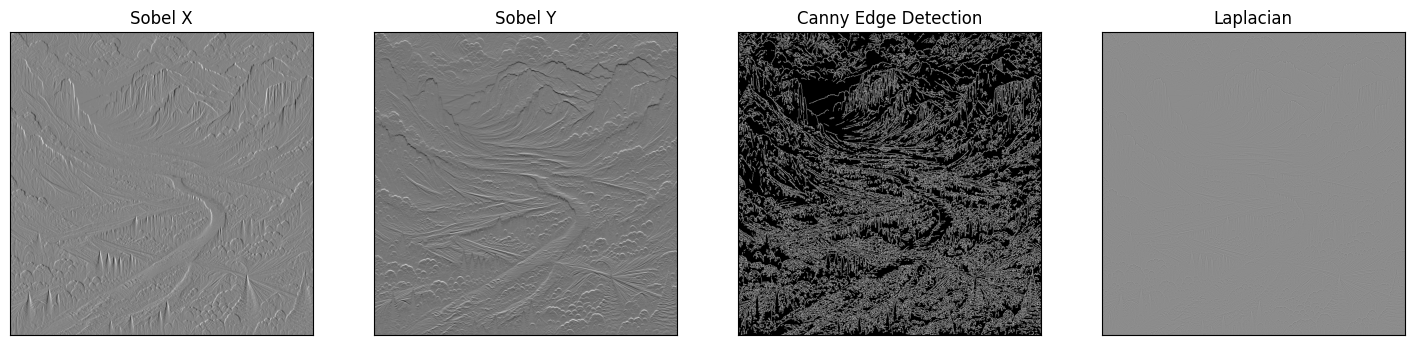

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the image in grayscale (Ensure the path is correct)
image_path = 'input_image.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filters in X and Y directions
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Apply Canny edge detector
canny = cv2.Canny(image, 100, 200)

# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the results
plt.figure(figsize=(18, 6))
plt.subplot(141), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()